## EDA

### Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [3]:
df= pd.read_csv('data/RDC_Inventory_Core_Metrics_County_History.csv', nrows=1000)
print(df.shape)

(1000, 40)


In [26]:
df.head()

,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,29147,"nodaway, mo",191000,-0.0484,-0.0445,38,0.1692,0.4074,39,0.3628,0.1846,16,-0.1111,-0.2000,0,NaN,NaN,16,0.0000,1.0000,18.0,-0.3333,-0.1000,117,0.0019,-0.0538,1776,-0.0306,-0.0226,233579,0.0040,-0.0595,55,-0.0678,0.1957,0.4737,-0.3571,-0.2671,0
1,54059,"mingo, wv",135000,0.0909,0.5607,8,0.0000,-0.5000,42,0.5556,-0.6056,0,-1.0000,-1.0000,0,NaN,NaN,0,-1.0000,-1.0000,9.0,-0.1429,0.8000,98,0.8337,1.4043,1562,-0.0370,-0.0787,128594,0.0517,0.0886,18,-0.0270,-0.1000,1.1250,-0.1875,0.8125,1
2,42007,"beaver, pa",215000,0.0462,0.1951,253,-0.0288,-0.1510,49,0.0538,0.3611,164,-0.0889,-0.2264,0,-1.0,NaN,100,-0.1525,-0.3056,239.0,-0.0808,-0.2138,131,0.0091,0.0385,1631,0.0422,0.1005,268395,-0.1132,0.0631,498,-0.0395,-0.1714,0.9447,-0.0534,-0.0755,0
3,37117,"martin, nc",149950,-0.0515,-0.1279,31,0.0000,0.1481,67,0.4889,0.2642,12,-0.1429,-0.2500,0,NaN,NaN,12,0.2000,0.5000,17.0,-0.2444,-0.1500,100,0.0125,0.1968,1465,-0.0384,-0.1262,187329,0.0107,0.0539,46,-0.0891,-0.0417,0.5484,-0.1774,-0.1924,1
4,40147,"washington, ok",259500,-0.0308,0.3569,88,0.0732,-0.0112,45,0.0349,0.3906,76,0.2667,-0.0952,4,NaN,0.0,32,0.4545,-0.2727,88.0,-0.0276,-0.1619,115,0.0615,0.1311,2100,-0.0150,0.1526,295897,0.0244,0.4239,180,0.0496,-0.0476,1.0000,-0.1037,-0.1798,0


In [6]:
df.columns

Index(['month_date_yyyymm', 'county_fips', 'county_name', 'median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy', 'active_listing_count', 'active_listing_count_mm', 'active_listing_count_yy', 'median_days_on_market', 'median_days_on_market_mm', 'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy', 'price_increased_count', 'price_increased_count_mm', 'price_increased_count_yy', 'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count', 'pending_listing_count_mm', 'pending_listing_count_yy', 'median_listing_price_per_square_foot', 'median_listing_price_per_square_foot_mm', 'median_listing_price_per_square_foot_yy', 'median_square_feet', 'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price', 'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count', 'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio',
       'pending_ratio

In [4]:
features= ['county_fips', 'median_listing_price', 'active_listing_count', 'median_days_on_market',\
           'new_listing_count','price_increased_count', 'price_reduced_count', 'pending_listing_count',\
           'median_listing_price_per_square_foot', 'average_listing_price', 'total_listing_count',\
          'quality_flag']
len(features)

12

In [7]:
df.isnull().sum()/len(df)

month_date_yyyymm                          0.000
county_fips                                0.000
county_name                                0.000
median_listing_price                       0.000
median_listing_price_mm                    0.000
median_listing_price_yy                    0.002
active_listing_count                       0.000
active_listing_count_mm                    0.000
active_listing_count_yy                    0.002
median_days_on_market                      0.000
median_days_on_market_mm                   0.000
median_days_on_market_yy                   0.002
new_listing_count                          0.000
new_listing_count_mm                       0.057
new_listing_count_yy                       0.079
price_increased_count                      0.000
price_increased_count_mm                   0.727
price_increased_count_yy                   0.765
price_reduced_count                        0.000
price_reduced_count_mm                     0.104
price_reduced_count_

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        1000 non-null   int64  
 1   county_fips                              1000 non-null   int64  
 2   county_name                              1000 non-null   object 
 3   median_listing_price                     1000 non-null   int64  
 4   median_listing_price_mm                  1000 non-null   float64
 5   median_listing_price_yy                  998 non-null    float64
 6   active_listing_count                     1000 non-null   int64  
 7   active_listing_count_mm                  1000 non-null   float64
 8   active_listing_count_yy                  998 non-null    float64
 9   median_days_on_market                    1000 non-null   int64  
 10  median_days_on_market_mm                 1000 non

In [12]:
df.describe()

,month_date_yyyymm,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
count,1000.0,1000.000000,1.000000e+03,1000.000000,998.000000,1000.00000,1000.000000,998.000000,1000.000000,1000.000000,998.000000,1000.000000,943.000000,921.000000,1000.000000,273.000000,235.000000,1000.000000,896.000000,844.000000,990.000000,983.000000,983.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,998.000000,1.000000e+03,1000.00000,998.000000,1000.000000,1000.000000,998.000000,990.000000,984.000000,988.000000,1000.00000
mean,202307.0,30754.699000,3.260396e+05,0.007242,0.201739,209.43500,0.073700,0.075379,54.577000,0.079879,0.332320,118.168000,0.010241,-0.130493,5.248000,-0.116046,0.042362,69.916000,0.170281,-0.060768,146.229293,0.049241,0.254527,169.105000,0.009362,0.114787,1904.100000,0.006291,0.028323,4.443599e+05,0.00670,0.241636,353.131000,0.046785,0.016068,0.625761,-0.042933,-0.065485,0.29400
std,0.0,15215.587357,2.316124e+05,0.151679,2.805062,613.55389,0.186455,0.457498,25.746708,0.283550,1.183545,318.064876,0.522023,0.427727,19.460864,0.905831,1.547994,190.933959,0.716191,0.587805,427.704321,0.415293,4.166374,88.447062,0.110458,1.217599,355.594814,0.097062,0.178015,3.565156e+05,0.13005,2.972556,1017.855285,0.141483,0.344276,0.409094,0.244117,0.353462,0.45582
min,202307.0,1003.000000,3.650000e+04,-0.713000,-0.790100,1.00000,-0.523800,-0.785700,13.000000,-0.894200,-0.846700,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,11.000000,-0.465500,-0.790800,816.000000,-0.391700,-0.641000,3.650000e+04,-0.62490,-0.832400,1.000000,-0.500000,-0.666700,0.000000,-5.000000,-5.200000,0.00000
25%,202307.0,19034.000000,1.999000e+05,-0.040100,-0.027600,21.00000,-0.001600,-0.195000,39.000000,-0.067200,0.000000,8.000000,-0.200000,-0.329300,0.000000,-1.000000,-0.612500,4.000000,-0.142900,-0.405550,9.000000,-0.105700,-0.251600,115.000000,-0.025625,-0.014350,1683.500000,-0.025025,-0.053025,2.585940e+05,-0.03950,-0.033300,31.000000,-0.025150,-0.182725,0.327925,-0.113425,-0.207775,0.00000
50%,202307.0,29207.000000,2.850000e+05,-0.001450,0.071600,52.00000,0.050250,-0.007400,50.000000,0.066700,0.184900,28.000000,-0.025600,-0.166700,0.000000,-0.310300,0.000000,16.000000,0.072300,-0.116700,27.000000,-0.001800,-0.120700,152.000000,0.000000,0.054250,1860.000000,-0.001300,0.014150,3.616960e+05,-0.00250,0.063450,82.000000,0.031000,-0.048300,0.543400,-0.031250,-0.049150,0.00000
75%,202307.0,46009.500000,3.909812e+05,0.032825,0.184150,166.25000,0.137375,0.228050,61.250000,0.208525,0.487100,92.000000,0.142900,0.000000,0.000000,0.200000,0.000000,56.000000,0.364175,0.069375,95.000000,0.111100,0.053950,204.250000,0.026125,0.131025,2098.250000,0.020750,0.089525,5.184338e+05,0.03535,0.189425,263.250000,0.103925,0.141900,0.845075,0.031200,0.082775,1.00000
max,202307.0,56045.000000,5.125000e+06,2.331000,88.130400,8915.00000,3.000000,4.000000,313.000000,2.066700,32.571400,5148.000000,5.000000,4.000000,220.000000,5.000000,15.500000,2304.000000,7.000000,4.000000,7155.000000,7.000000,110.000000,1192.000000,1.018600,37.927000,3786.000000,1.322000,1.639000,5.125000e+06,1.89270,88.130400,15398.000000,1.4000

In [19]:
df[['month_date_yyyymm']].value_counts()

month_date_yyyymm
202307               1000
dtype: int64

In [5]:
df.drop(columns=['month_date_yyyymm'], inplace=True)
df.shape

(1000, 39)

In [23]:
df['county_name'].unique()

array(['nodaway, mo', 'mingo, wv', 'beaver, pa', 'martin, nc',
       'washington, ok', 'antelope, ne', 'woods, ok', 'san juan, co',
       'polk, ga', 'dundy, ne', 'lanier, ga', 'oneida, wi', 'logan, co',
       'buffalo, ne', 'major, ok', 'orange, nc', 'shelby, tx',
       'roosevelt, mt', 'polk, wi', 'atoka, ok', 'marion, wv',
       'montgomery, tx', 'crawford, wi', 'la plata, co', 'foard, tx',
       'edmunds, sd', 'waseca, mn', 'cooper, mo', 'litchfield, ct',
       'lincoln, co', 'lincoln, or', 'stark, nd', 'dallas, al',
       'coffee, ga', 'lafourche, la', 'roane, tn', 'washington, vt',
       'goochland, va', 'rutherford, tn', 'okaloosa, fl', 'jerauld, sd',
       'wyoming, wv', 'fairbanks north star, ak', 'aiken, sc',
       'hanover, va', 'lee, ky', 'peoria, il', 'webster, mo',
       'fredericksburg city, va', 'hamilton, fl', 'fountain, in',
       'warren, il', 'wilkinson, ms', 'miami, oh', 'montrose, co',
       'clay, ga', 'kiowa, ks', 'allen, ky', 'putnam, mo', 'miller

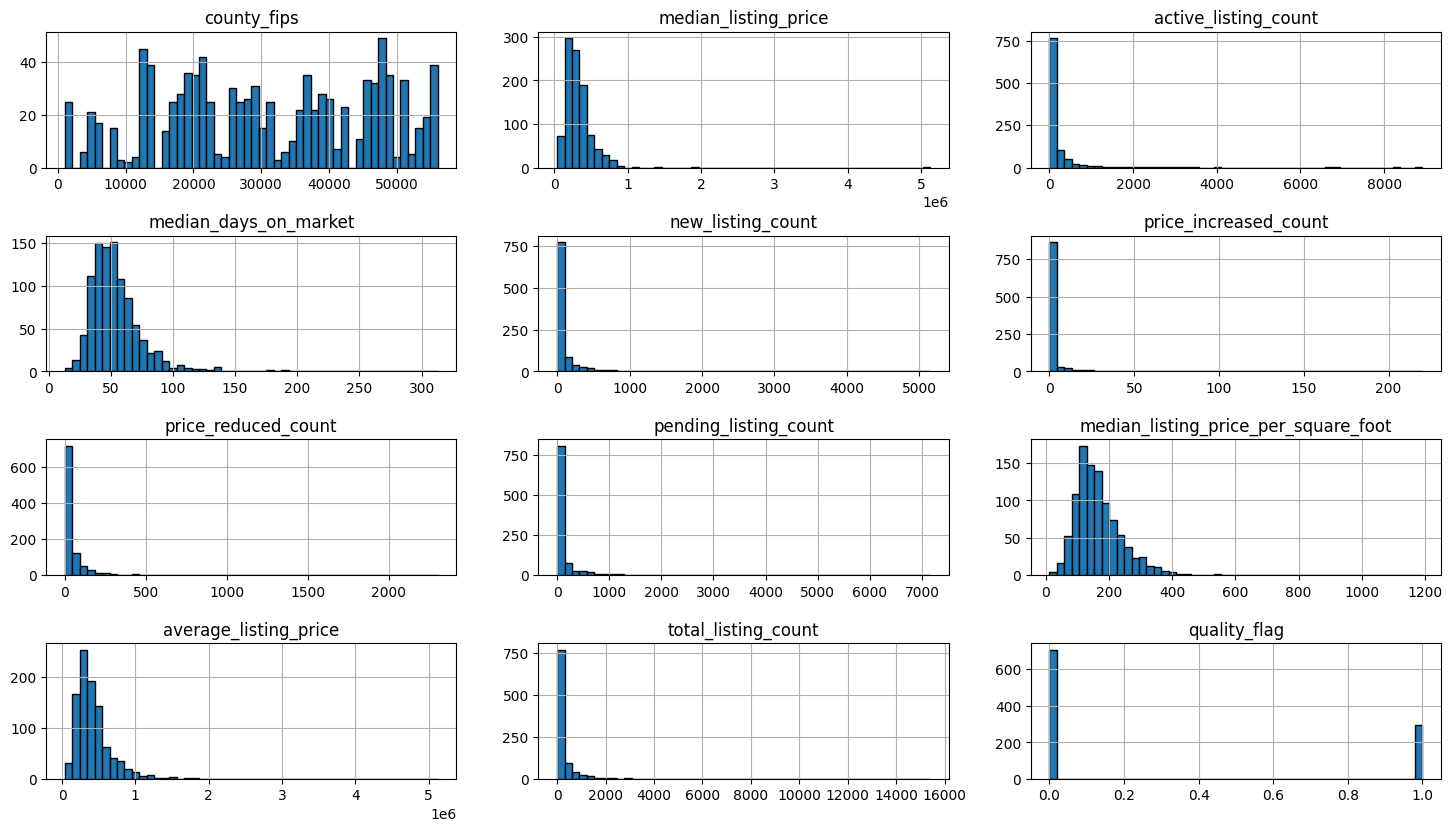

In [31]:
plt.figure(figsize=(18,15))
length= len(features)
plt.figure(figsize=(18,15))
for i,j in itertools.zip_longest(features, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[i].hist(bins=50, edgecolor='black')
    plt.title(i)
plt.show();

### Clean Data

In [8]:
from sklearn.impute import SimpleImputer

In [7]:
mis_col= [col for col in df.columns if df[col].isnull().sum() > 0]

In [6]:
df_num= df.select_dtypes(exclude= ['object'])

In [9]:
simple_impute= SimpleImputer(strategy='mean')
simple_impute.fit(df_num)
df_clean= simple_impute.transform(df_num)

In [ ]:
df_filtered= pd.DataFrame(df_clean, columns=df_num.columns)

In [12]:
df_filtered.isnull().sum()

county_fips                                0
median_listing_price                       0
median_listing_price_mm                    0
median_listing_price_yy                    0
active_listing_count                       0
active_listing_count_mm                    0
active_listing_count_yy                    0
median_days_on_market                      0
median_days_on_market_mm                   0
median_days_on_market_yy                   0
new_listing_count                          0
new_listing_count_mm                       0
new_listing_count_yy                       0
price_increased_count                      0
price_increased_count_mm                   0
price_increased_count_yy                   0
price_reduced_count                        0
price_reduced_count_mm                     0
price_reduced_count_yy                     0
pending_listing_count                      0
pending_listing_count_mm                   0
pending_listing_count_yy                   0
median_lis

### Outlier Analysis

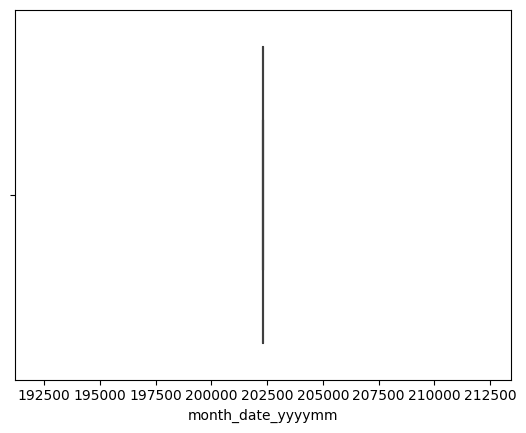

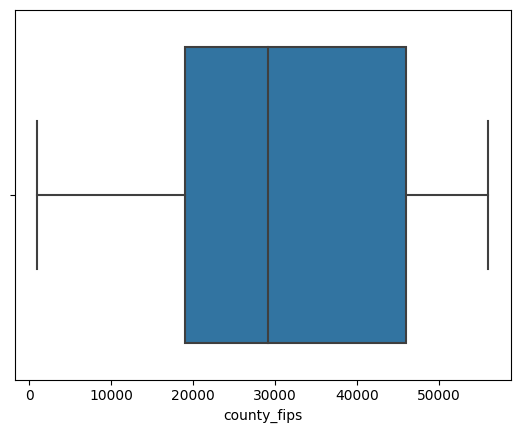

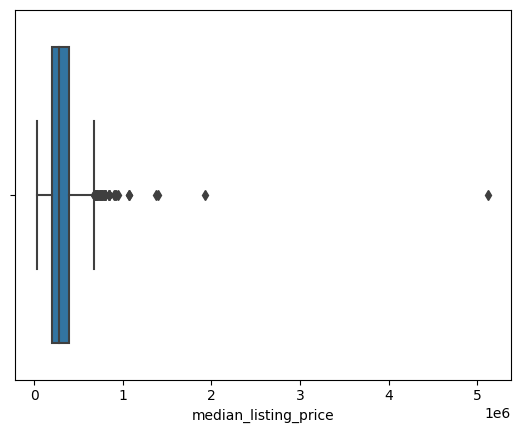

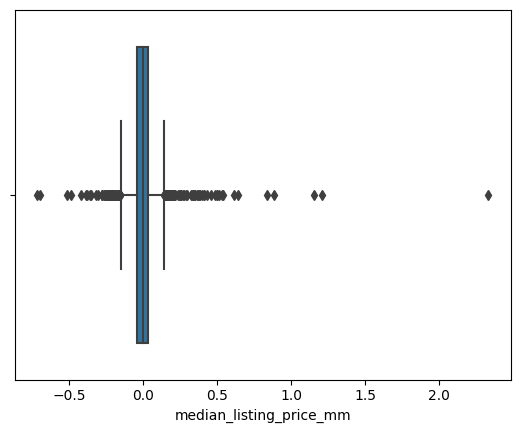

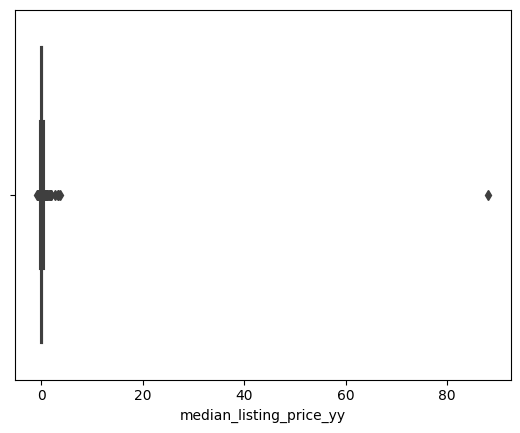

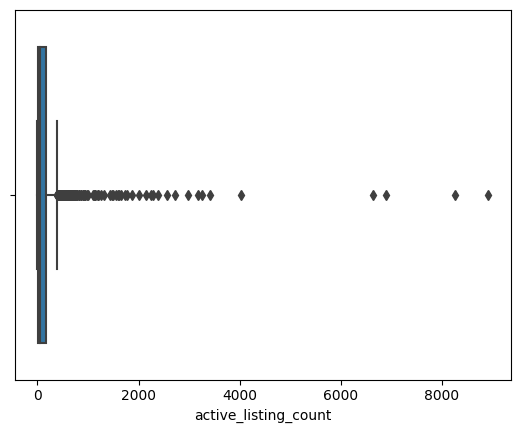

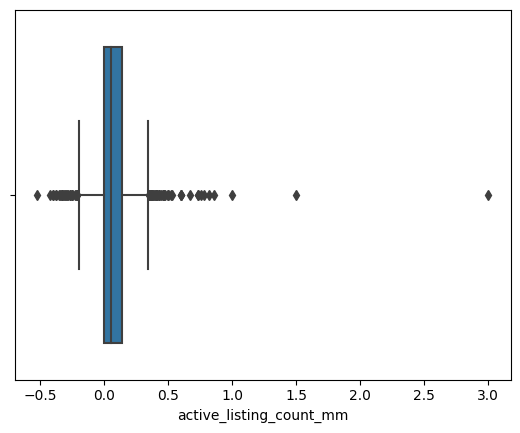

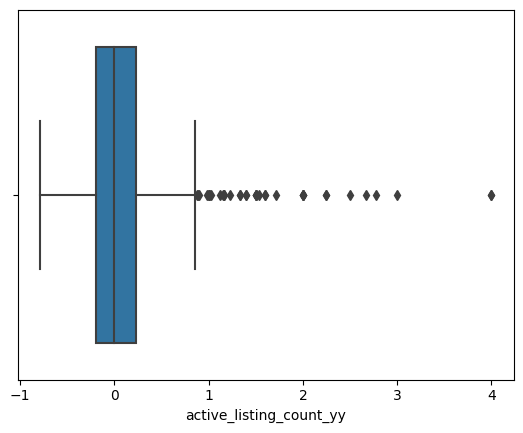

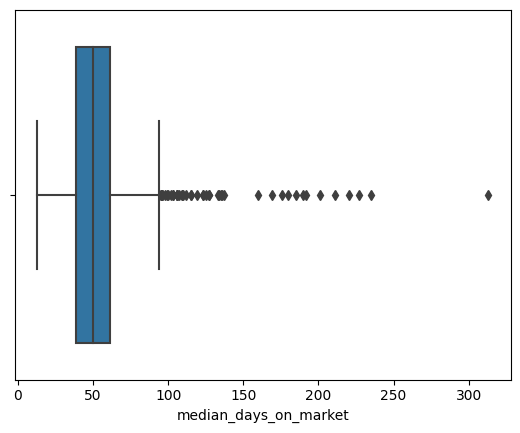

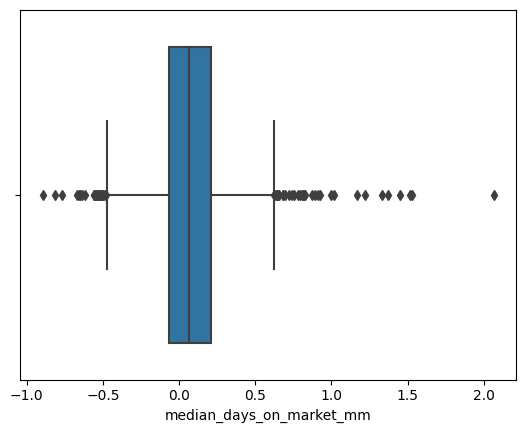

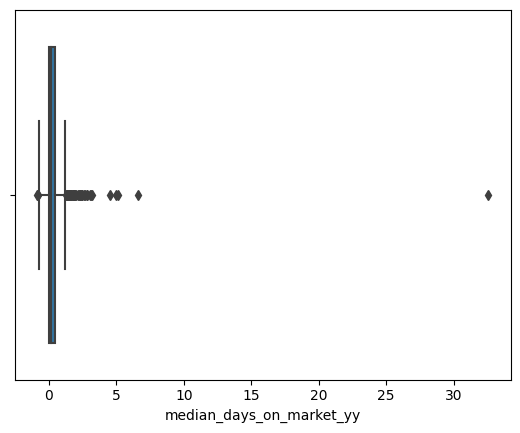

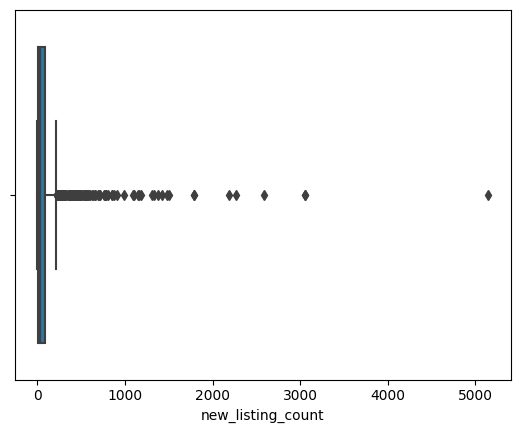

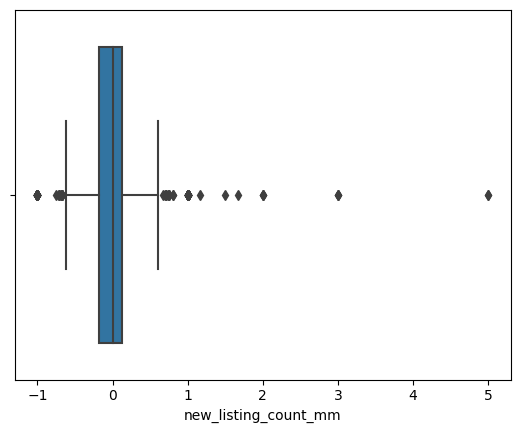

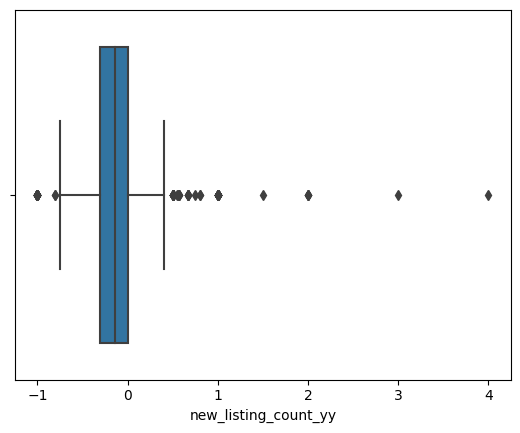

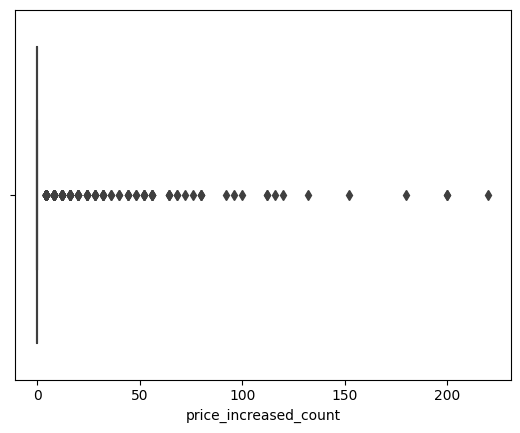

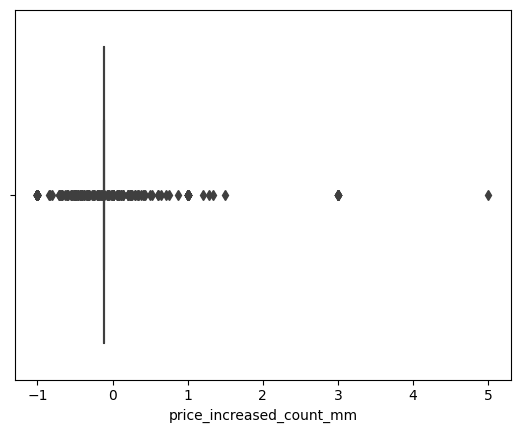

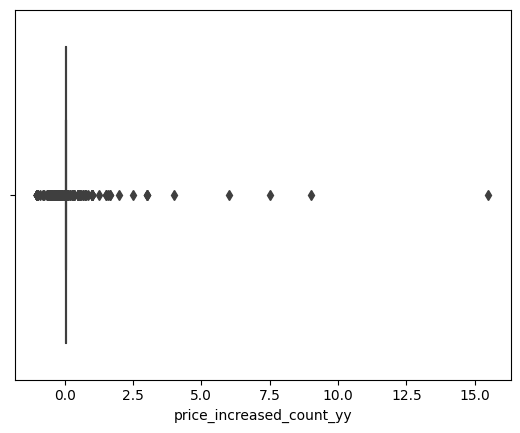

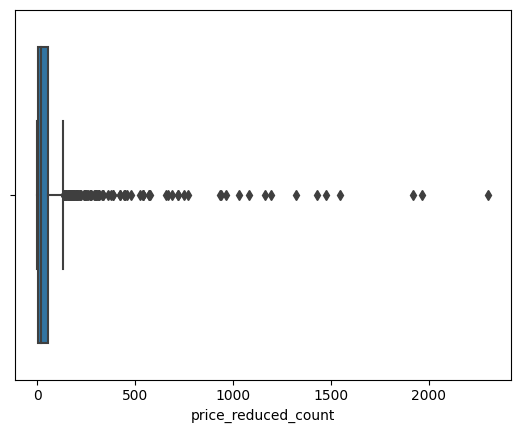

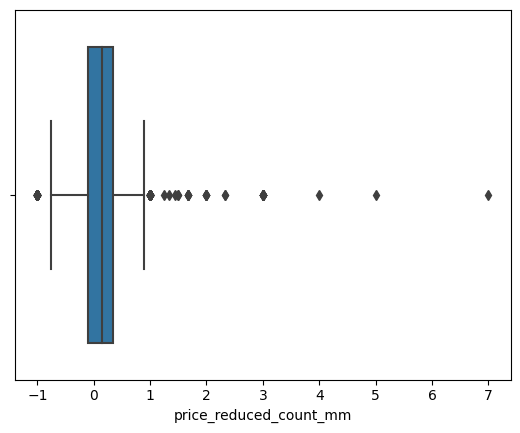

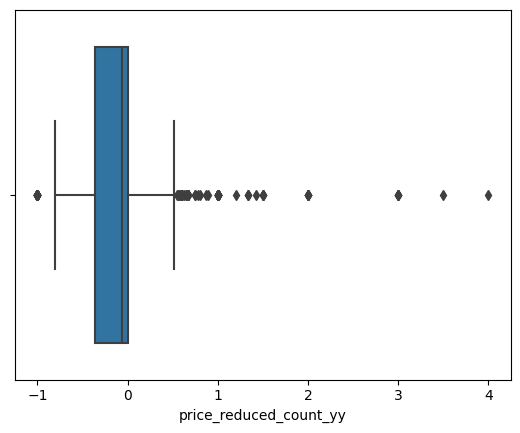

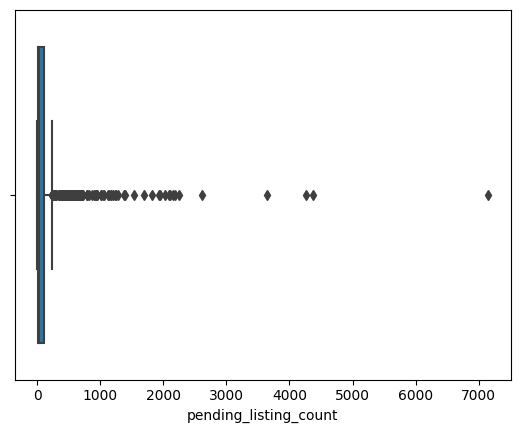

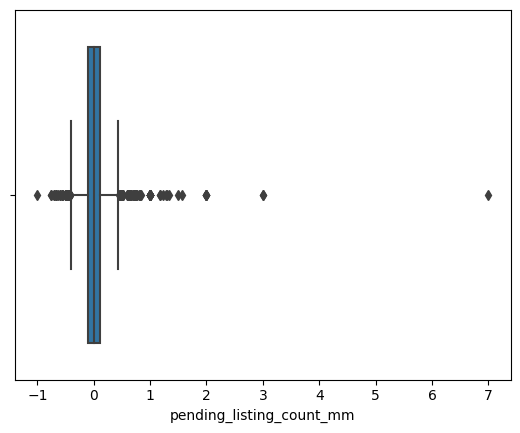

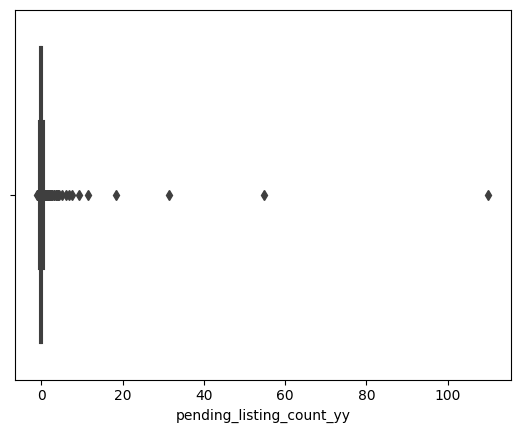

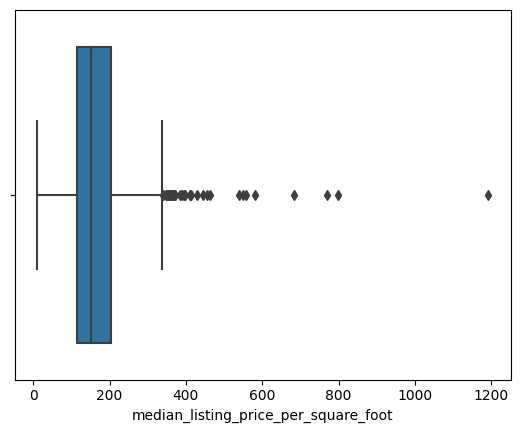

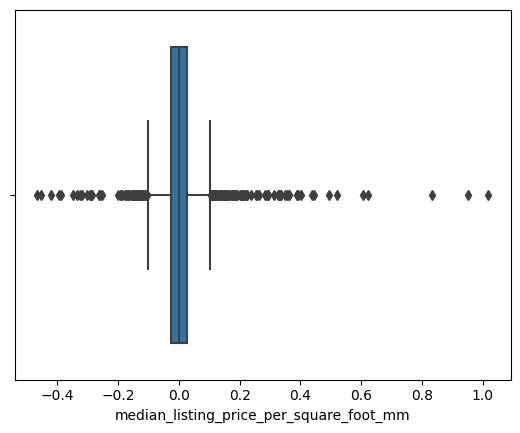

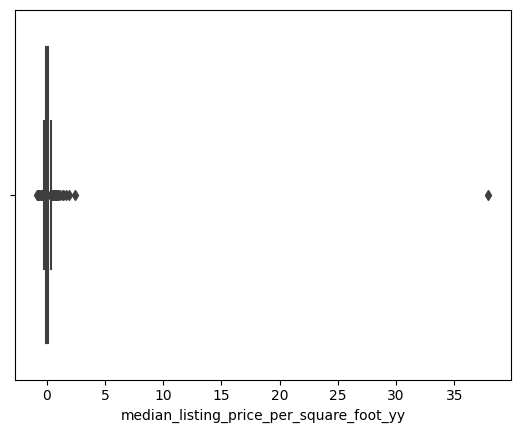

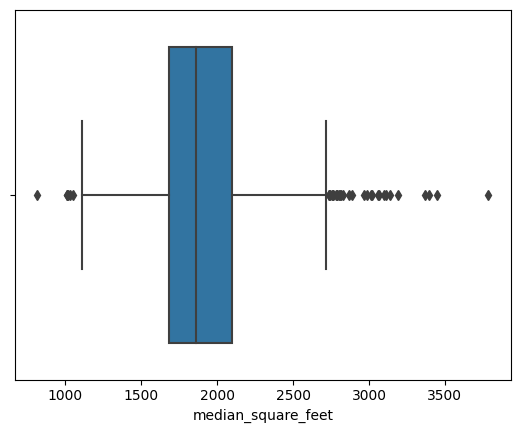

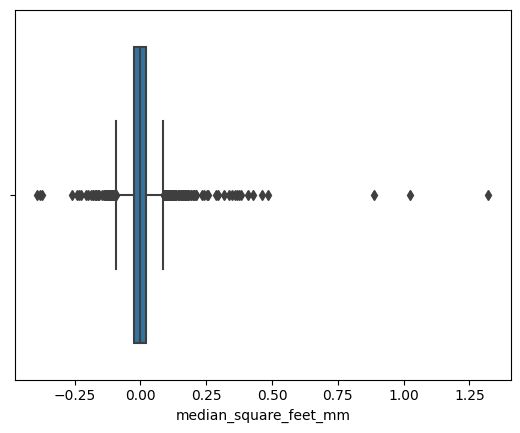

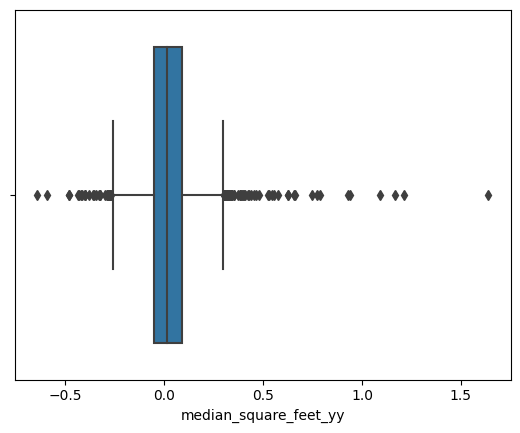

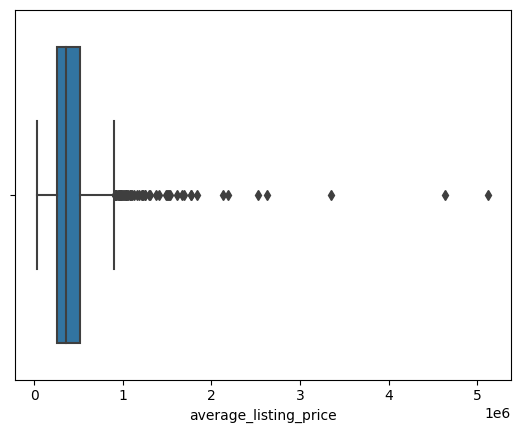

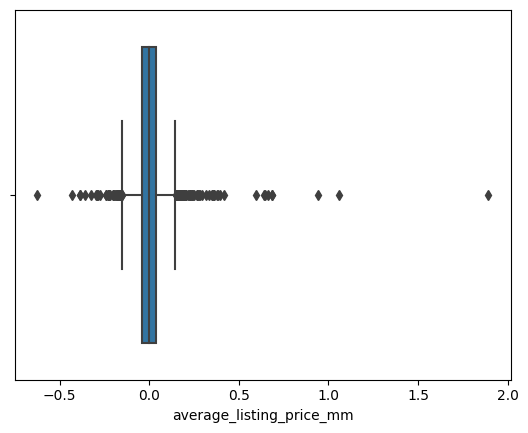

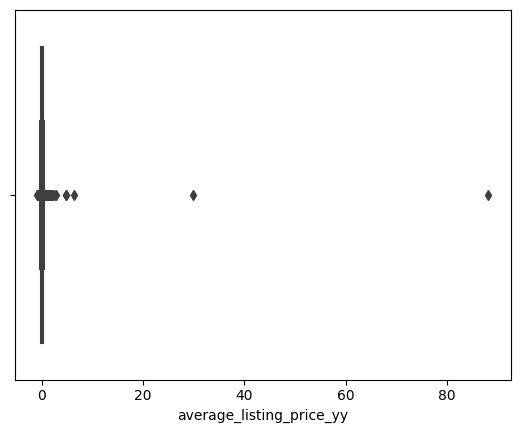

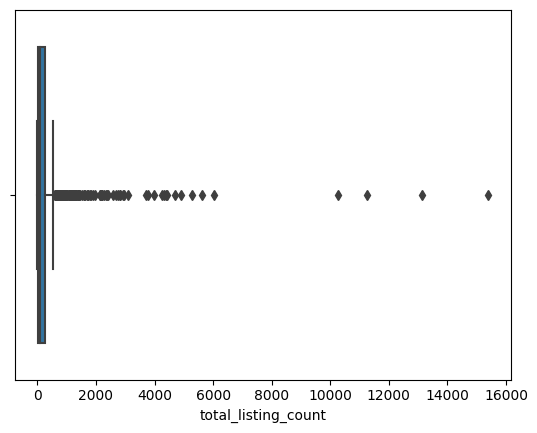

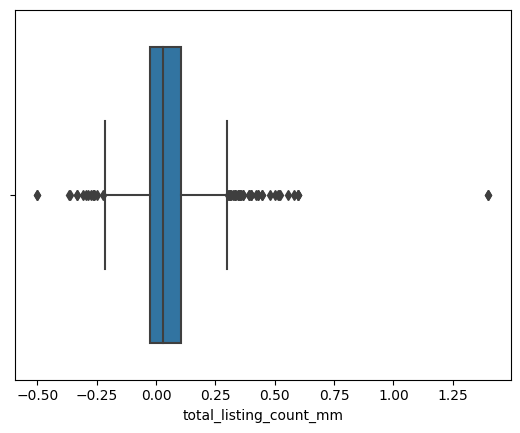

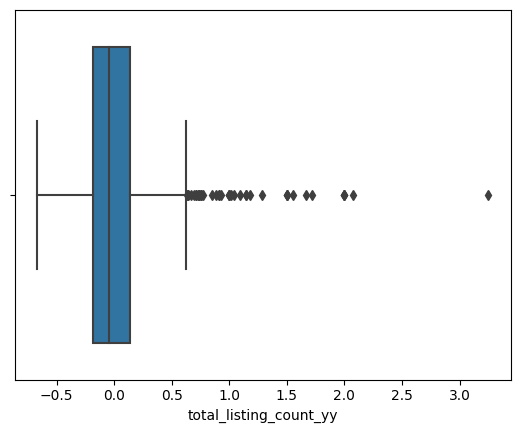

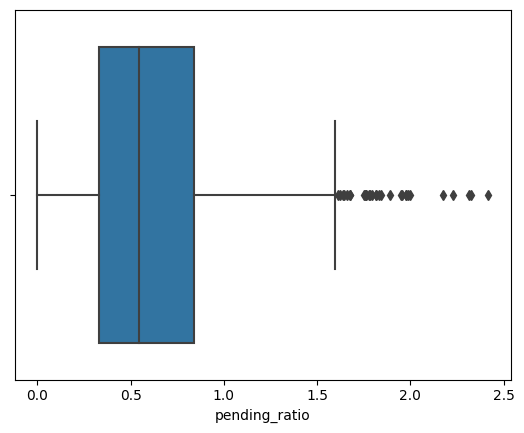

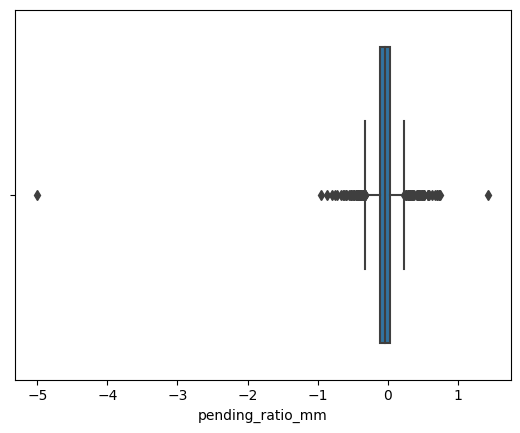

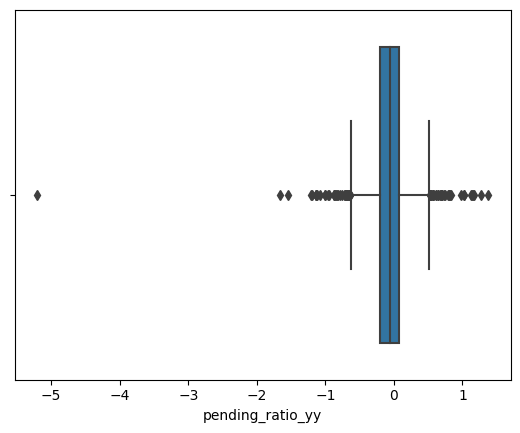

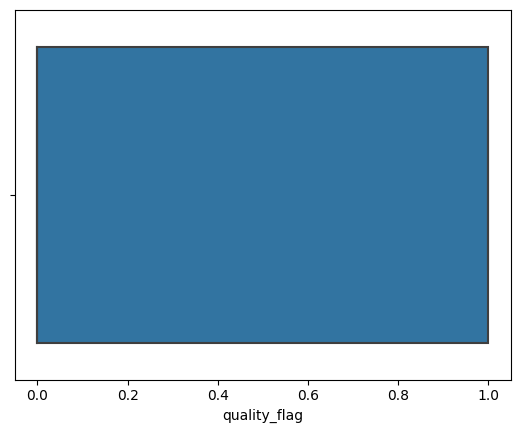

In [157]:
for i in df_num.columns:
    sns.boxplot(df_filtered[i])
    plt.show();

In [11]:
# It is obvious that we have lots of outliers above
def outlier_threshold(i):
    quart1= df_filtered[i].quantile(0.05)
    quart3= df_filtered[i].quantile(0.95)
    interquart= quart3 - quart1
    low_limit= quart1 - (1.5 * interquart)
    up_limit= quart3 + (1.5 * interquart)
    return low_limit, up_limit

In [13]:
for i in df_num.columns:
    low_limit, up_limit= outlier_threshold(i)
    #print(low_limit, up_limit)

In [14]:
# check outliers
def check_outlier(i):
    low_limit, up_limit= outlier_threshold(i)
    if df_filtered[(df_filtered[i] > up_limit) | (df_filtered[i] < low_limit)].any(axis=None):
        return f'{i}: True'
    else:
        return f'{i}: False'

In [15]:
for i in df_num.columns:
    print(check_outlier(i))

county_fips: False
median_listing_price: True
median_listing_price_mm: True
median_listing_price_yy: True
active_listing_count: True
active_listing_count_mm: True
active_listing_count_yy: True
median_days_on_market: True
median_days_on_market_mm: True
median_days_on_market_yy: True
new_listing_count: True
new_listing_count_mm: True
new_listing_count_yy: True
price_increased_count: True
price_increased_count_mm: True
price_increased_count_yy: True
price_reduced_count: True
price_reduced_count_mm: True
price_reduced_count_yy: True
pending_listing_count: True
pending_listing_count_mm: True
pending_listing_count_yy: True
median_listing_price_per_square_foot: True
median_listing_price_per_square_foot_mm: True
median_listing_price_per_square_foot_yy: True
median_square_feet: False
median_square_feet_mm: True
median_square_feet_yy: True
average_listing_price: True
average_listing_price_mm: True
average_listing_price_yy: True
total_listing_count: True
total_listing_count_mm: True
total_listing

In [16]:
# lets replace outliers with the threshold we defined
def replace_outliers(i):
    low_limit, up_limit= outlier_threshold(i)
    df_filtered.loc[(df_filtered[i] < low_limit), i]= low_limit
    df_filtered.loc[(df_filtered[i] > up_limit), i]= up_limit

In [17]:
for i in df_num.columns:
    replace_outliers(i)
    print(check_outlier(i))

county_fips: False
median_listing_price: False
median_listing_price_mm: False
median_listing_price_yy: False
active_listing_count: False
active_listing_count_mm: False
active_listing_count_yy: False
median_days_on_market: False
median_days_on_market_mm: False
median_days_on_market_yy: False
new_listing_count: False
new_listing_count_mm: False
new_listing_count_yy: False
price_increased_count: False
price_increased_count_mm: False
price_increased_count_yy: False
price_reduced_count: False
price_reduced_count_mm: False
price_reduced_count_yy: False
pending_listing_count: False
pending_listing_count_mm: False
pending_listing_count_yy: False
median_listing_price_per_square_foot: False
median_listing_price_per_square_foot_mm: False
median_listing_price_per_square_foot_yy: False
median_square_feet: False
median_square_feet_mm: False
median_square_feet_yy: False
average_listing_price: False
average_listing_price_mm: False
average_listing_price_yy: False
total_listing_count: False
total_listin

In [141]:
df['county_name'].unique()

array(['nodaway, mo', 'mingo, wv', 'beaver, pa', 'martin, nc',
       'washington, ok', 'antelope, ne', 'woods, ok', 'san juan, co',
       'polk, ga', 'dundy, ne', 'lanier, ga', 'oneida, wi', 'logan, co',
       'buffalo, ne', 'major, ok', 'orange, nc', 'shelby, tx',
       'roosevelt, mt', 'polk, wi', 'atoka, ok', 'marion, wv',
       'montgomery, tx', 'crawford, wi', 'la plata, co', 'foard, tx',
       'edmunds, sd', 'waseca, mn', 'cooper, mo', 'litchfield, ct',
       'lincoln, co', 'lincoln, or', 'stark, nd', 'dallas, al',
       'coffee, ga', 'lafourche, la', 'roane, tn', 'washington, vt',
       'goochland, va', 'rutherford, tn', 'okaloosa, fl', 'jerauld, sd',
       'wyoming, wv', 'fairbanks north star, ak', 'aiken, sc',
       'hanover, va', 'lee, ky', 'peoria, il', 'webster, mo',
       'fredericksburg city, va', 'hamilton, fl', 'fountain, in',
       'warren, il', 'wilkinson, ms', 'miami, oh', 'montrose, co',
       'clay, ga', 'kiowa, ks', 'allen, ky', 'putnam, mo', 'miller

In [18]:
df_filtered= pd.concat([df_filtered,df['county_name']], axis=1)
df_filtered.head()

,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,county_name
0,29147.0,191000.0,-0.0484,-0.0445,38.0,0.1692,0.4074,39.0,0.3628,0.1846,16.0,-0.1111,-0.2000,0.0,-0.116046,0.042362,16.0,0.0000,1.0000,18.0,-0.3333,-0.1000,117.0,0.001900,-0.053800,1776.0,-0.0306,-0.0226,233579.0,0.0040,-0.0595,55.0,-0.0678,0.1957,0.4737,-0.3571,-0.2671,0.0,"nodaway, mo"
1,54059.0,135000.0,0.0909,0.5607,8.0,0.0000,-0.5000,42.0,0.5556,-0.6056,0.0,-1.0000,-1.0000,0.0,-0.116046,0.042362,0.0,-1.0000,-1.0000,9.0,-0.1429,0.8000,98.0,0.622895,1.180627,1562.0,-0.0370,-0.0787,128594.0,0.0517,0.0886,18.0,-0.0270,-0.1000,1.1250,-0.1875,0.8125,1.0,"mingo, wv"
2,42007.0,215000.0,0.0462,0.1951,253.0,-0.0288,-0.1510,49.0,0.0538,0.3611,164.0,-0.0889,-0.2264,0.0,-1.000000,0.042362,100.0,-0.1525,-0.3056,239.0,-0.0808,-0.2138,131.0,0.009100,0.038500,1631.0,0.0422,0.1005,268395.0,-0.1132,0.0631,498.0,-0.0395,-0.1714,0.9447,-0.0534,-0.0755,0.0,"beaver, pa"
3,37117.0,149950.0,-0.0515,-0.1279,31.0,0.0000,0.1481,67.0,0.4889,0.2642,12.0,-0.1429,-0.2500,0.0,-0.116046,0.042362,12.0,0.2000,0.5000,17.0,-0.2444,-0.1500,100.0,0.012500,0.196800,1465.0,-0.0384,-0.1262,187329.0,0.0107,0.0539,46.0,-0.0891,-0.0417,0.5484,-0.1774,-0.1924,1.0,"martin, nc"
4,40147.0,259500.0,-0.0308,0.3569,88.0,0.0732,-0.0112,45.0,0.0349,0.3906,76.0,0.2667,-0.0952,4.0,-0.116046,0.000000,32.0,0.4545,-0.2727,88.0,-0.0276,-0.1619,115.0,0.061500,0.131100,2100.0,-0.0150,0.1526,295897.0,0.0244,0.4239,180.0,0.0496,-0.0476,1.0000,-0.1037,-0.1798,0.0,"washington, ok"


### Feature Engineering

In [19]:
df= df_filtered.copy()

In [20]:
df['city']= df['county_name'].str.split(',').str[0].apply(lambda x:x.strip())
df['state']= df['county_name'].str.split(',').str[1].apply(lambda x:x.strip())

In [86]:
df['state2']= 'other_states'

In [87]:
df.loc[df['state']=='tx','state2']= 'tx'
df.loc[df['state']=='fl','state2']= 'fl'
df.loc[df['state']=='oh','state2']= 'oh'

In [88]:
df['state2'].value_counts()

other_states    867
tx               77
fl               28
oh               28
Name: state2, dtype: int64

In [26]:
df[['average_listing_price']].describe()

,average_listing_price
count,1.000000e+03
mean,4.363857e+05
std,2.880933e+05
min,3.650000e+04
25%,2.585940e+05
50%,3.616960e+05
75%,5.184338e+05
max,2.086071e+06


In [99]:
df.columns

Index(['county_fips', 'median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy', 'active_listing_count', 'active_listing_count_mm', 'active_listing_count_yy', 'median_days_on_market', 'median_days_on_market_mm', 'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy', 'price_increased_count', 'price_increased_count_mm', 'price_increased_count_yy', 'price_reduced_count', 'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm', 'pending_listing_count_yy', 'median_listing_price_per_square_foot', 'median_listing_price_per_square_foot_mm', 'median_listing_price_per_square_foot_yy', 'median_square_feet', 'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price', 'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count', 'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio', 'pending_ratio_mm', 'pending_ratio_yy',
       'quality_f

### Data Visualization

<AxesSubplot:xlabel='state', ylabel='average_listing_price'>

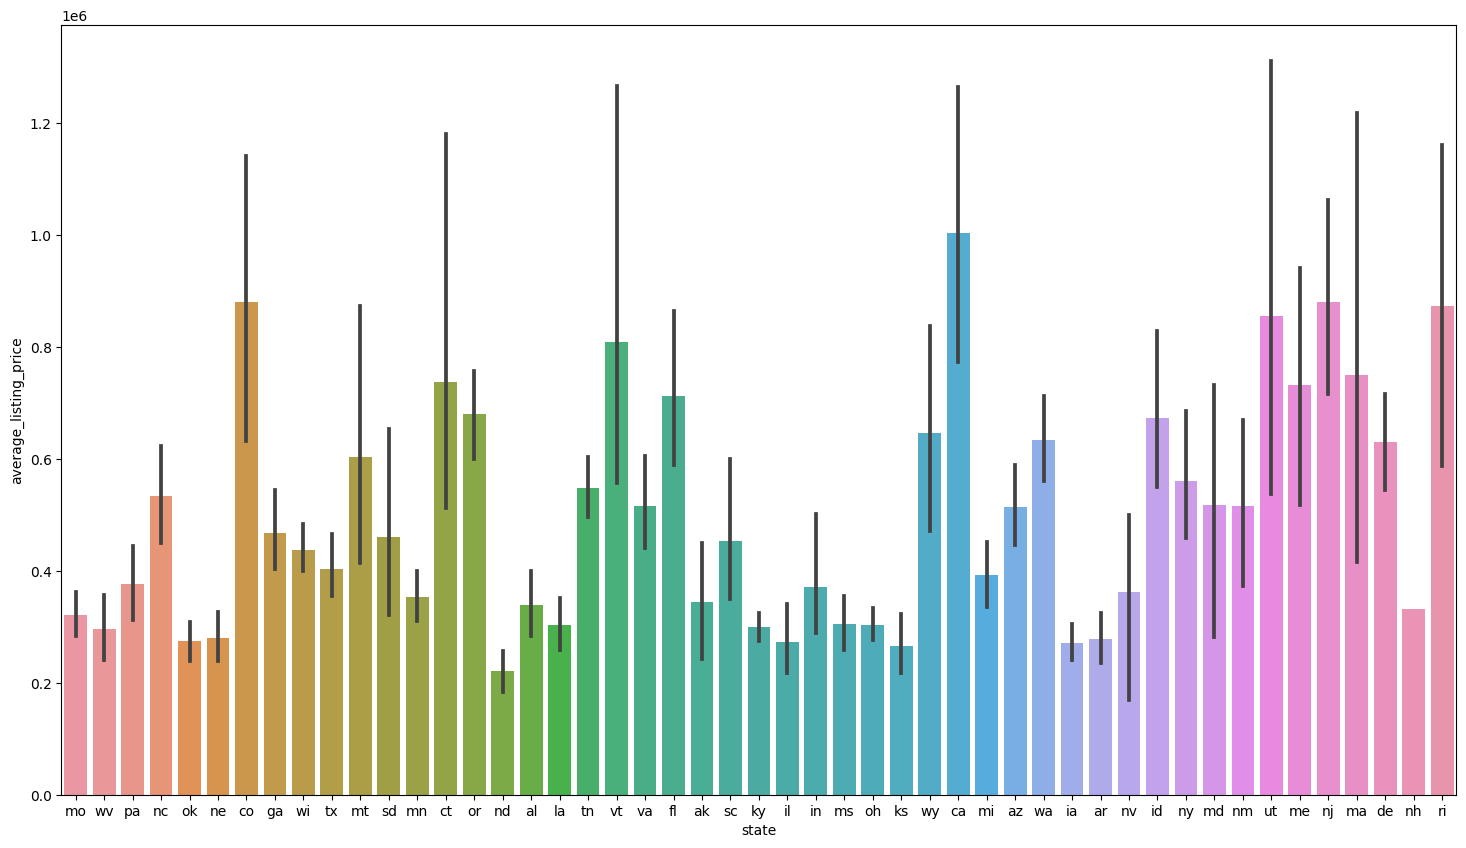

In [90]:
plt.figure(figsize=(18,10))
sns.barplot(y='average_listing_price', x='state',data=df)

<AxesSubplot:xlabel='state2', ylabel='average_listing_price'>

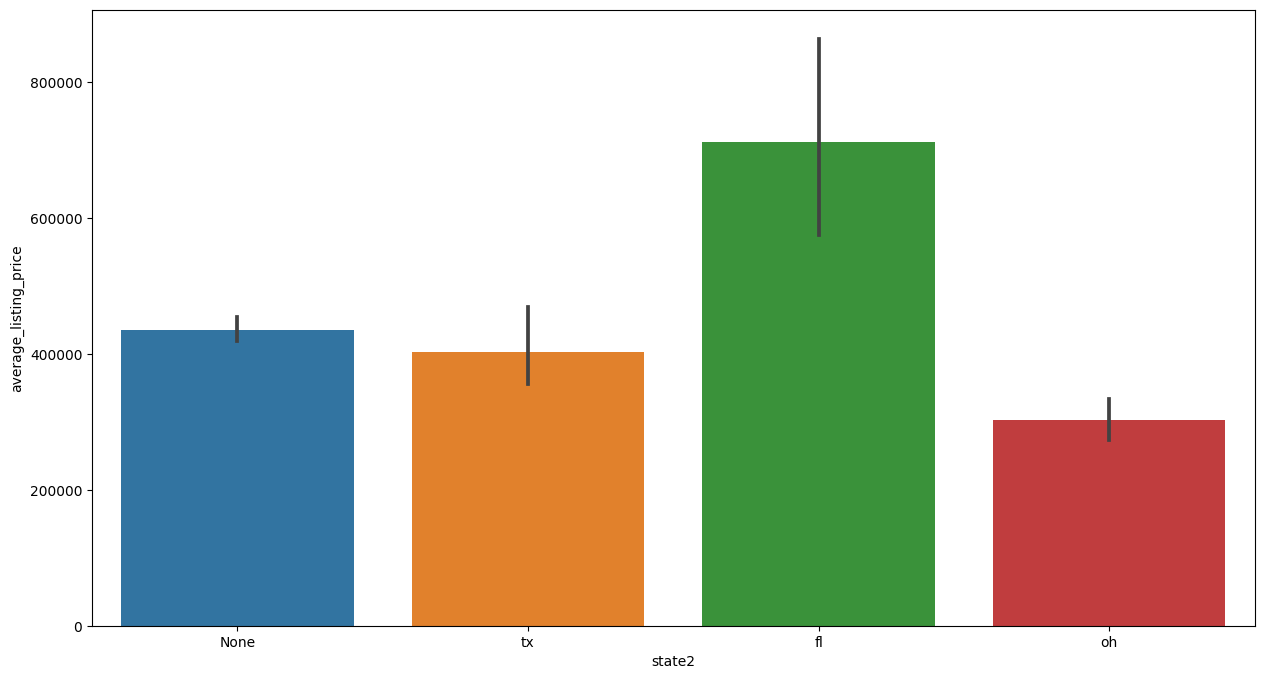

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(y='average_listing_price', x='state2',data=df)

<AxesSubplot:xlabel='quality_flag', ylabel='count'>

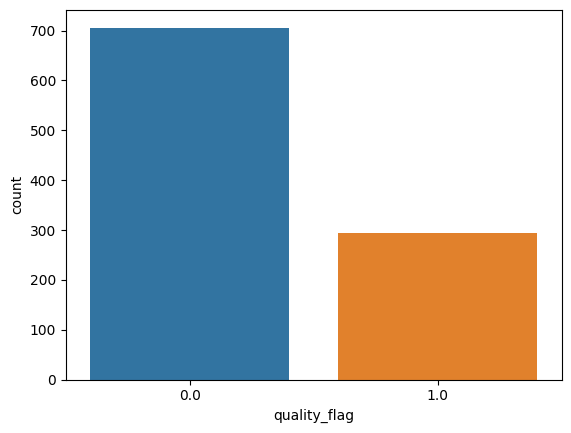

In [50]:
sns.countplot(df['quality_flag'])

<AxesSubplot:xlabel='price_increased_count', ylabel='average_listing_price'>

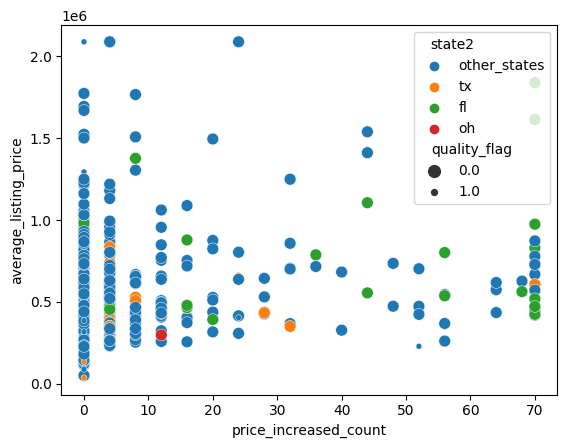

In [97]:
sns.scatterplot(x='price_increased_count', y='average_listing_price', size='quality_flag', hue='state2', data=df)

In [89]:
len(df['state'].unique())

49

In [51]:
df['state2'].value_counts()

None    867
tx       77
fl       28
oh       28
Name: state2, dtype: int64

In [73]:
# lets focus on 3 states (tx, oh, fl)
df= df.loc[(df['state']=='tx') | (df['state']=='fl') | (df['state']=='oh')]
df.shape

(133, 41)

In [100]:
df[['city', 'state', 'state2', 'county_name']]

,city,state,state2,county_name
0,nodaway,mo,other_states,"nodaway, mo"
1,mingo,wv,other_states,"mingo, wv"
2,beaver,pa,other_states,"beaver, pa"
3,martin,nc,other_states,"martin, nc"
4,washington,ok,other_states,"washington, ok"
...,...,...,...,...
995,livingston,la,other_states,"livingston, la"
996,brookings,sd,other_states,"brookings, sd"
997,clinton,pa,other_states,"clinton, pa"
998,prairie,ar,other_states,"prairie, ar"


In [21]:
df.drop(columns=['county_name'], inplace=True)
df.shape

(1000, 40)

<AxesSubplot:>

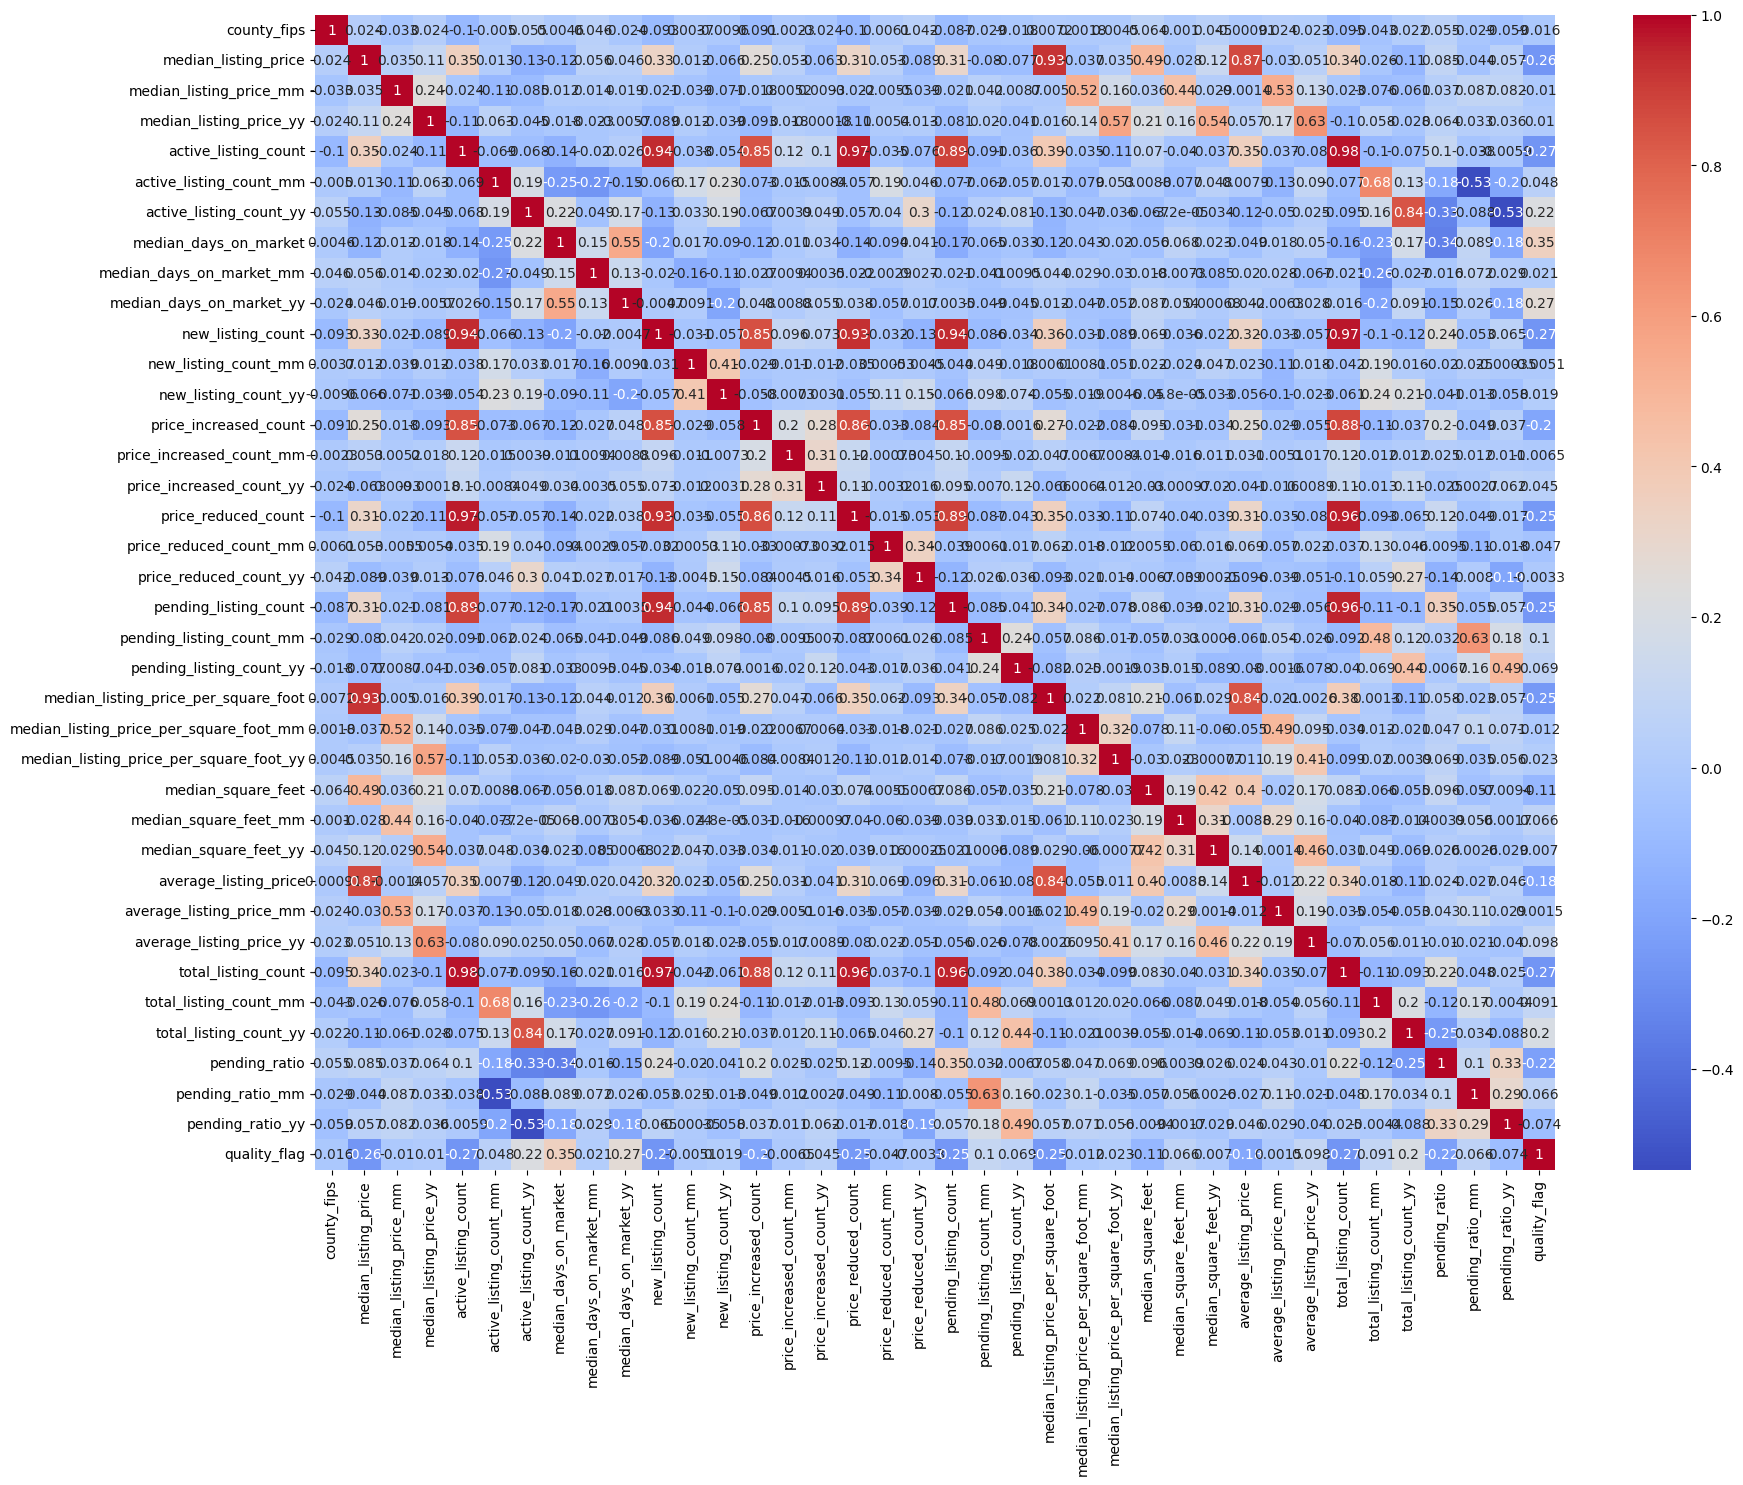

In [103]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Holdout & Clustering & PCA

In [170]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
import plotly.express as px

In [176]:
X= df.drop(columns=['average_listing_price'])
y= df['average_listing_price']

In [177]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)
X_train.shape, y_train.shape

((700, 39), (700,))

In [127]:
cat_features= list(X.select_dtypes(include=['object']))
num_features= list(X.select_dtypes(exclude=['object']))

In [175]:
class Custom_label_enc(BaseEstimator, TransformerMixin):
    def fit(self, X, y= None):
        return self
    def transform (self, X, y= None):
        le= LabelEncoder()
        for i in cat_features:
            le.fit(X[i])
            X[i]= le.transform(X[i])
        return X

In [178]:
cat_pipeline= make_pipeline(Custom_label_enc(), StandardScaler())
num_pipeline= make_pipeline(StandardScaler())
preproc_pipeline= make_column_transformer(
                        (cat_pipeline, make_column_selector(dtype_include='object')),
                        (num_pipeline, make_column_selector(dtype_include=np.number)),
                        remainder= 'passthrough'
                       )

In [179]:
pipeline_features= make_pipeline(preproc_pipeline)
pipeline_features.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_label_enc',
                                                                   Custom_label_enc()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd79e6b5cc0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd79e6b6890>)]))])

In [180]:
X_train_transform= pipeline_features.transform(X_train)

In [181]:
pd.DataFrame(X_train_transform, columns=pipeline_features.feature_names_in_)

,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,city,state
0,0.746609,-0.152858,-0.073176,-0.322231,-0.417064,-0.127402,-0.354701,0.142916,-0.129833,-0.607261,-0.014069,-0.800128,-0.343852,-0.524838,-0.192517,-0.333798,0.013989,-2.732546,-0.281453,-0.374578,1.021992,-0.375438,-1.127377,-1.050609,-0.263775,-0.719412,-0.010590,0.008329,-0.482679,0.157297,-0.245605,-0.341572,-0.369548,-1.015358,-0.997763,-0.326140,-1.478673,-2.478857,-0.663573
1,0.115795,0.645115,0.578917,-0.905863,-0.356055,-0.057540,1.061801,-0.675283,-0.733429,-0.859109,-0.101799,-0.445298,1.708373,-0.117030,-0.398659,-0.333798,-2.057861,-2.732546,0.458391,-0.549636,-0.797270,1.726416,-0.191823,-0.351913,-0.589519,-0.079764,0.088954,-1.179762,-0.157189,-0.105199,-0.010016,-0.105200,1.400544,-0.621821,-0.671485,1.225913,0.280270,0.482096,-0.663573
2,1.403985,-1.676261,-1.915035,-0.128428,-0.178176,-0.554813,0.699944,-0.931914,-0.741979,-0.229489,-0.143977,-0.005656,0.672488,-0.083206,-0.107031,0.647273,-0.048952,-0.031329,0.492020,-0.002639,-0.599169,0.915971,-0.197651,-0.178334,0.015433,-0.315424,0.038234,-0.010967,0.097698,-0.665419,-0.151885,0.089175,0.818161,-0.793248,-0.508204,0.724958,0.475592,0.770196,-0.663573
3,-0.720865,1.370545,1.364606,0.288055,-0.217133,-0.202866,-0.398000,0.186997,1.112023,0.777903,-0.694314,-0.505101,-0.402487,-0.067255,2.032430,-0.333798,0.013989,0.083100,-0.382341,0.060162,1.021992,-0.367864,0.366748,0.055537,0.457514,-0.593166,0.360567,-0.691845,-0.811759,-1.007460,-0.416709,-0.321650,-0.399549,0.236804,0.593022,0.198308,0.382933,-0.872171,-0.663573
4,-0.926709,-1.023374,-0.737223,-0.916414,-0.109082,-0.080607,-0.305216,-0.803900,-0.956195,-0.397388,0.387127,-0.278031,-0.343852,-0.964164,-0.379148,-0.333798,0.013989,0.083100,-0.247824,-0.253843,-0.125489,-0.212592,-0.168511,0.820682,-0.670955,0.801156,-0.215841,-1.303809,-0.312755,0.284568,-0.022053,0.056600,-0.261895,-0.445177,-0.246954,0.863473,0.426630,2.058056,-0.663573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.723528,-1.531175,-1.726133,0.449651,-0.159800,-0.404873,-0.193875,-0.155983,-0.193150,0.148283,-0.069069,-0.299234,-0.324307,-0.168342,-0.320874,-0.333798,0.013989,0.083100,-0.146936,1.316184,-0.202049,-0.436032,-0.105016,-0.536838,0.934496,-0.335062,-0.351410,-0.672549,0.252066,-0.452922,-0.300634,-0.741090,-0.309545,0.081775,-0.201235,-1.277880,0.196035,0.045982,-0.663573
696,-0.979831,-0.660659,-0.605727,-0.302340,-0.259765,-0.287228,-0.042328,-0.410199,-0.229199,-0.649236,-0.056584,-0.098804,-0.011587,-0.554819,-0.301364,-0.006774,2.629828,0.083100,0.189357,-0.292152,-0.319735,-0.045959,-0.670643,-0.349644,-0.252142,-0.159252,0.089428,-0.316949,-0.124880,-0.338151,-0.290316,-0.116776,-0.041296,-0.832005,-0.373319,0.242848,-0.677909,-0.258637,-0.663573
697,0.700128,-0.370487,-0.476990,-0.133426,0.404710,0.316815,0.276230,0.971381,-0.673115,-0.985033,0.073661,-0.640110,0.437948,-0.125486,-0.084440,-0.006774,0.013989,0.083100,0.424762,0.825551,-0.229772,-0.144424,0.350184,-0.129874,0.143404,0.219487,0.215043,-0.746977,-0.287625,-0.018269,0.910847,0.135749,

In [124]:
# scaling & PCA
pipeline= make_pipeline(StandardScaler(), PCA())
pipeline.fit(X_train_transform)
X_train_transform= pipeline.transform(X_train_transform)

In [136]:
pipeline.feature_names_in_

array(['county_fips', 'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count',
       'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price_mm', 'average_listing_price_yy',
       'total_listing_count', 'total_listing_count_mm',
       'total_listing_count

In [137]:
pd.DataFrame(X_train_transform, columns=pipeline.feature_names_in_)

,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,city,state
0,-0.615259,-0.594129,0.301027,0.195083,-3.172976,0.696445,-1.812744,-0.457779,0.276434,-1.675119,-0.672524,-0.598526,0.090246,-0.360392,-1.187789,-0.386306,0.503815,0.645661,-1.035868,0.875831,-1.151917,-0.029458,-0.003325,-0.190169,0.010301,0.125755,-0.980490,-0.523164,-0.271042,0.495268,-0.331406,0.077968,-0.006413,-0.012358,-0.009000,0.207310,0.026578,0.008091,0.012496
1,2.247197,0.238071,-2.045825,-0.991876,-0.774890,-0.667890,-1.026758,0.870152,0.986069,-1.842888,0.265181,-2.162276,2.190610,0.929478,-0.422730,-0.101799,0.440510,0.383980,-0.630042,0.490080,0.349016,0.124758,-0.412358,0.215654,-0.130742,-0.078506,-0.082882,0.255762,-0.025005,-0.757118,0.161606,0.740748,0.122310,0.155137,-0.280126,0.149552,-0.111868,-0.018659,0.034511
2,2.218638,0.136827,-1.554737,0.166208,0.510928,2.257179,0.108236,0.219193,-0.464855,-0.485044,-0.307359,0.399167,0.333644,0.816131,-1.066348,-0.945547,-0.242945,0.310694,0.167658,0.055085,0.158755,0.062008,0.179322,-0.462759,-0.093159,0.009579,0.444050,0.085640,-0.024994,-0.025255,0.002301,0.182187,0.115499,-0.114557,-0.181967,0.054578,0.044949,-0.164975,0.026249
3,-1.139356,-1.698445,0.840898,-0.804579,-0.104315,-2.151143,-0.145053,-0.768503,0.371205,0.158015,-1.077719,0.556891,1.074111,-0.802535,0.180468,-0.500031,0.283709,0.573453,0.804667,0.042039,0.115865,-0.698506,0.857404,0.500119,0.740802,0.050397,0.114140,-0.651073,-0.130222,0.033211,-0.057776,-0.103616,0.227912,0.139395,0.104084,-0.109129,0.012517,-0.012266,-0.000498
4,-0.442303,0.580567,-2.684527,-0.519034,0.898585,1.019315,-0.324362,0.678858,-1.425248,-0.323896,0.276720,0.150832,0.496850,-0.531135,0.638415,0.155353,0.144066,-0.260244,-0.407726,0.173682,0.392360,0.095213,-0.145869,1.263459,-0.147173,0.487460,0.527779,0.378317,0.154652,-0.051618,-0.010390,-0.198268,-0.002590,-0.115721,0.026035,-0.134714,-0.053512,0.180611,0.006690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.280800,-0.738426,-0.358333,0.205858,-0.016917,2.277155,0.247012,-1.846445,-0.443155,-0.444697,-0.112068,0.321441,-0.316273,-0.933659,1.323267,0.244928,1.109210,0.233438,0.240012,0.027549,1.264486,0.241169,0.244836,-0.139534,-0.205384,-0.470351,0.165134,0.171329,0.136305,0.093226,0.206806,0.114166,-0.019393,-0.046791,0.060989,-0.002510,0.152536,-0.098646,0.037835
696,0.605754,-0.324195,-0.759506,0.434825,-0.658380,1.056487,-0.881842,0.510533,-0.706368,0.646574,-0.202280,1.012540,-0.486860,-1.908472,0.454101,-0.217677,-0.185518,0.900154,-0.897693,0.905540,-0.055378,0.208928,0.441587,-0.264886,0.043344,0.385451,-0.209917,0.224215,0.117369,-0.132466,-0.109855,-0.065636,-0.121968,-0.024072,0.162932,-0.054415,0.058798,0.014133,-0.003796
697,0.477677,0.519791,0.297467,-1.586702,0.565629,0.993280,-0.897301,-0.439802,-0.311706,0.536085,-0.320094,-0.548415,-0.624954,0.576944,-0.285722,0.328077,0.830967,-0.516737,-0.463761,0.078817,0.622731,-0.493437,0.088865,-0.065427,-0.077368,-0.219763,-0.159509,0.507536,-0.002932,-0.062342,-0.034206,-0.033225,0.079621,0.148892,0.183971,0.082394,0.004952,-0.076329,-0.03055

In [140]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('pca', PCA())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

In [154]:
pca_var_ratio= pipeline.get_params()['pca'].explained_variance_ratio_

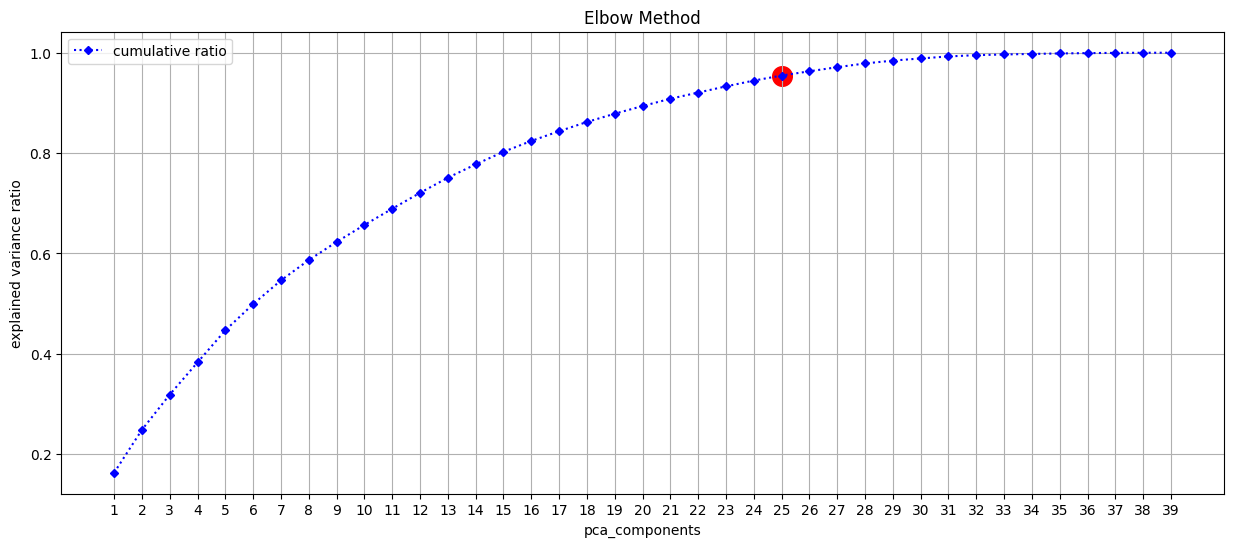

In [178]:
plt.figure(figsize=(15,6))
ax= plt.gca()
exp_ratio= np.cumsum(pca_var_ratio)
x= np.arange(1, exp_ratio.shape[0]+1)
ax.plot(x, exp_ratio, color='blue', label='cumulative ratio', linestyle=':', marker='D', markersize=4)
ax.set_xlabel('pca_components')
ax.set_ylabel('explained variance ratio')
ax.set_xticks(x)
ax.legend(loc='best')
ax.set_title('Elbow Method')
ax.scatter(x=25, y= exp_ratio[25-1], c='red', s=200)
ax.grid(axis='x', linewidth=0.8)
ax.grid(axis='y', linewidth=0.8)

In [179]:
exp_ratio[24]

0.9544729602088529

In [142]:
pipeline= make_pipeline(PCA(n_components=25))
pipeline.fit(X_train_transform)
X_train_transform= pipeline.transform(X_train)

In [57]:
df_transform= pd.DataFrame(X_train_transform, columns=pipeline.feature_names_in_[:25])
df_transform.head()

,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy
0,-0.615259,-0.594129,0.301027,0.195083,-3.172976,0.696445,-1.812744,-0.457779,0.276434,-1.675119,-0.672524,-0.598526,0.090246,-0.360392,-1.187789,-0.386306,0.503815,0.645661,-1.035868,0.875831,-1.151917,-0.029458,-0.003325,-0.190169,0.010301
1,2.247197,0.238071,-2.045825,-0.991876,-0.774890,-0.667890,-1.026758,0.870152,0.986069,-1.842888,0.265181,-2.162276,2.190610,0.929478,-0.422730,-0.101799,0.440510,0.383980,-0.630042,0.490080,0.349016,0.124758,-0.412358,0.215654,-0.130742
2,2.218638,0.136827,-1.554737,0.166208,0.510928,2.257179,0.108236,0.219193,-0.464855,-0.485044,-0.307359,0.399167,0.333644,0.816131,-1.066348,-0.945547,-0.242945,0.310694,0.167658,0.055085,0.158755,0.062008,0.179322,-0.462759,-0.093159
3,-1.139356,-1.698445,0.840898,-0.804579,-0.104315,-2.151143,-0.145053,-0.768503,0.371205,0.158015,-1.077719,0.556891,1.074111,-0.802535,0.180468,-0.500031,0.283709,0.573453,0.804667,0.042039,0.115865,-0.698506,0.857404,0.500119,0.740802
4,-0.442303,0.580567,-2.684527,-0.519034,0.898585,1.019315,-0.324362,0.678858,-1.425248,-0.323896,0.276720,0.150832,0.496850,-0.531135,0.638415,0.155353,0.144066,-0.260244,-0.407726,0.173682,0.392360,0.095213,-0.145869,1.263459,-0.147173


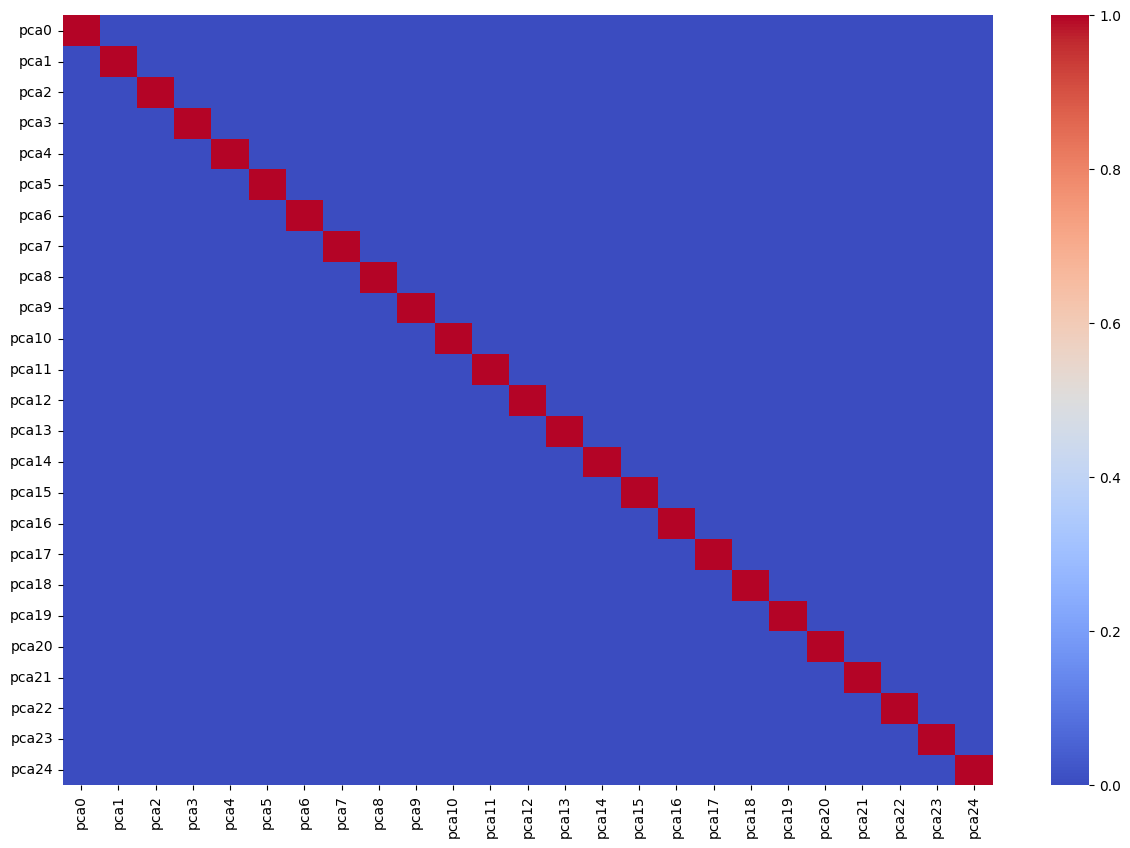

In [193]:
plt.figure(figsize=(15,10))
sns.heatmap(df_transform.corr(), cmap='coolwarm')
plt.show();

In [41]:
df_transform.iloc[:,:2]

,pca0,pca1
0,-0.615259,-0.594129
1,2.247197,0.238071
2,2.218638,0.136827
3,-1.139356,-1.698445
4,-0.442303,0.580567
...,...,...
695,-0.280800,-0.738426
696,0.605754,-0.324195
697,0.477677,0.519791
698,0.250435,-0.400931


In [58]:
cluster_features= ['county_fips', 'median_listing_price', 'active_listing_count', 'median_days_on_market', \
                  'new_listing_count', 'price_increased_count', 'price_reduced_count', 'pending_listing_count', \
                  'median_listing_price_per_square_foot']
len(cluster_features)

9

In [59]:
df_transform[cluster_features]

,county_fips,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot
0,-0.615259,-0.594129,-3.172976,-0.457779,-0.672524,-0.360392,0.503815,0.875831,-0.003325
1,2.247197,0.238071,-0.774890,0.870152,0.265181,0.929478,0.440510,0.490080,-0.412358
2,2.218638,0.136827,0.510928,0.219193,-0.307359,0.816131,-0.242945,0.055085,0.179322
3,-1.139356,-1.698445,-0.104315,-0.768503,-1.077719,-0.802535,0.283709,0.042039,0.857404
4,-0.442303,0.580567,0.898585,0.678858,0.276720,-0.531135,0.144066,0.173682,-0.145869
...,...,...,...,...,...,...,...,...,...
695,-0.280800,-0.738426,-0.016917,-1.846445,-0.112068,-0.933659,1.109210,0.027549,0.244836
696,0.605754,-0.324195,-0.658380,0.510533,-0.202280,-1.908472,-0.185518,0.905540,0.441587
697,0.477677,0.519791,0.565629,-0.439802,-0.320094,0.576944,0.830967,0.078817,0.088865
698,0.250435,-0.400931,-1.100767,-0.947845,-0.579105,-0.060267,-0.111431,0.328265,-0.128653


In [60]:
# Cluster only first 5 columns
n_clusters_try= np.arange(1,21,1)
wcss=[]
for i in n_clusters_try:
    print(f'working with {i} clusters')
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_transform[cluster_features])
    wcss.append(kmeans.inertia_)
print('Done!')

working with 1 clusters
working with 2 clusters
working with 3 clusters
working with 4 clusters
working with 5 clusters
working with 6 clusters
working with 7 clusters
working with 8 clusters
working with 9 clusters
working with 10 clusters
working with 11 clusters
working with 12 clusters
working with 13 clusters
working with 14 clusters
working with 15 clusters
working with 16 clusters
working with 17 clusters
working with 18 clusters
working with 19 clusters
working with 20 clusters
Done!


In [61]:
wcss

[12524.229759883285,
 9483.832520387557,
 8307.449773456681,
 7316.06055821376,
 6579.072317652769,
 6133.368481870323,
 5798.639665771956,
 5558.9563058726235,
 5319.922443355031,
 5152.008549889748,
 4983.748718362667,
 4845.508716207469,
 4675.49638830965,
 4542.27157918066,
 4461.958297544473,
 4367.584325852478,
 4286.739262048701,
 4187.349470626275,
 4071.684113849362,
 4032.078567975785]

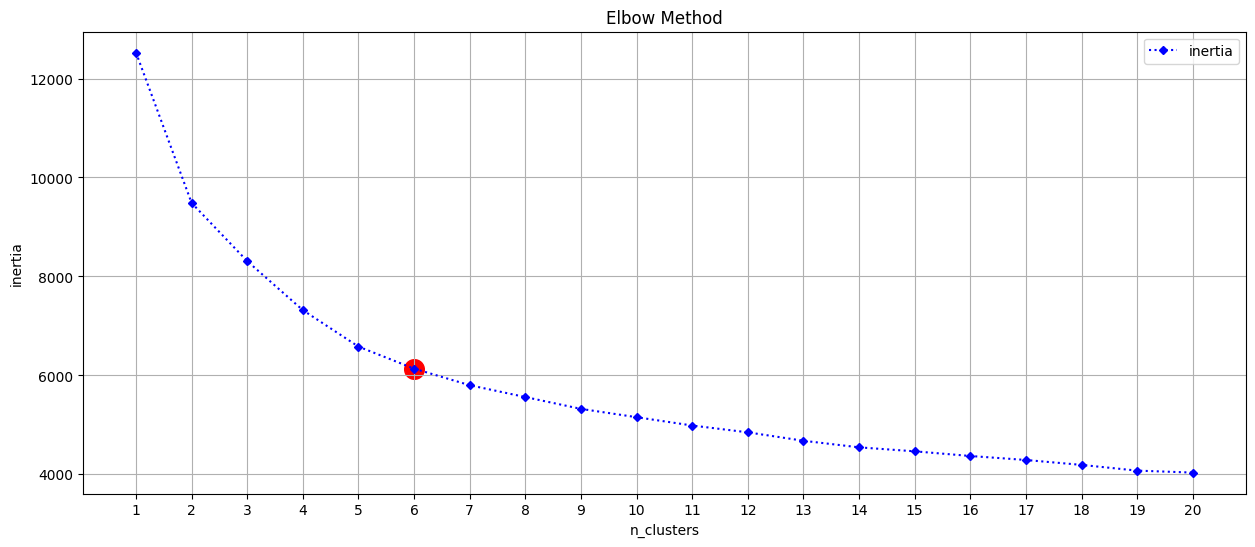

In [63]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(15,6))
    ax= plt.gca()
    ax.plot(n_clusters_try, wcss, color='blue', label='inertia', linestyle=':', marker='D', markersize=4)
    ax.set_xlabel('n_clusters')
    ax.set_ylabel('inertia')
    ax.set_xticks(n_clusters_try)
    ax.legend(loc='best')
    ax.set_title('Elbow Method')
    ax.scatter(x=6, y= wcss[6-1], c='red', s=200)
    ax.grid(axis='x', linewidth=0.8)
    ax.grid(axis='y', linewidth=0.8)
    plt.show();

In [70]:
clusters= 6
kmeans= KMeans(n_clusters=clusters)
kmeans.fit(df_transform[cluster_features])
labels= kmeans.labels_
cluster_3d= px.scatter_3d(df_transform[cluster_features], x='county_fips', y= 'median_listing_price',\
              z='price_increased_count', color= labels, width=500, height=500)
cluster_3d.show();

## Modelling

### Model all Features without PCA

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error, mean_absolute_error

In [229]:
def score_fun(y_true, y_pred):
    return -1 * np.sqrt(np.mean((np.log(abs(1+y_true)) - np.log(abs(1+y_pred)))**2))
rmsle= make_scorer(score_fun, greater_is_better= False)   

In [111]:
# Another method
def score_fun(y_true, y_pred):
    return -1* np.sqrt(mean_squared_log_error(abs(y_true), abs(y_pred)))

rmsle= make_scorer(score_fun, greater_is_better= False)    

In [185]:
X_train_transform.shape

(700, 39)

In [230]:
# start with linear regression
lin_reg= LinearRegression()
lin_score= cross_val_score(lin_reg, X_train_transform, y_train, cv=5, scoring=rmsle).mean()
lin_score

0.39812222648985085

In [231]:
# compare with other models
rfr= RandomForestRegressor()
svr= SVR()
knr= KNeighborsRegressor()
gbr= GradientBoostingRegressor()
models= {'rfr':rfr, 'svr':svr, 'knr':knr, 'gbr':gbr}
scores={}
for k,v in models.items():
    score= cross_val_score(v, X_train_transform, y_train, cv=5, scoring=rmsle, n_jobs=-1).mean()
    scores[k]= score

In [232]:
scores

{'rfr': 0.21966334926246733,
 'svr': 0.5655389298474274,
 'knr': 0.3702071317558132,
 'gbr': 0.21154969227508374}

In [189]:
gbr.fit(X_train_transform, y_train)

GradientBoostingRegressor()

In [182]:
X_test_transform= pipeline_features.transform(X_test)

In [184]:
pd.DataFrame(X_test_transform, columns= pipeline_features.feature_names_in_).head()

,county_fips,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,pending_listing_count,pending_listing_count_mm,pending_listing_count_yy,median_listing_price_per_square_foot,median_listing_price_per_square_foot_mm,median_listing_price_per_square_foot_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,city,state
0,-0.880228,0.209857,0.378980,-0.683738,1.813046,-0.398282,-0.391815,-1.277913,-0.894033,-1.530704,-0.625142,-0.859750,-0.265672,-0.501200,0.834342,-0.006774,0.013989,0.083100,-0.348711,-0.253843,-0.813977,-0.447394,1.074702,-0.951582,-0.577885,3.588865,-0.448110,-0.168093,1.454704,-0.069973,2.966665,-0.340495,-0.424257,-0.730640,-1.001171,-1.049306,0.630374,-0.162494,-0.663573
1,-1.604005,1.007830,1.362505,-0.130927,-0.037048,-0.524825,-0.475320,-0.938556,-0.971909,0.316182,-0.443608,0.047985,-0.461123,-0.451617,-0.534718,-0.333798,0.013989,0.083100,-0.449599,-0.253843,0.104007,-0.439820,0.379325,-0.309450,-0.159072,-0.783938,-0.279833,-0.008211,0.181464,-0.718260,-0.682392,-1.360289,-0.473671,-0.737348,-0.939834,0.033852,0.927305,0.680330,-0.663573
2,-0.554861,1.298002,1.562704,-0.966392,0.176848,0.357019,-0.512434,3.576939,5.629947,-1.404780,-3.304954,-2.064687,-0.480668,1.854557,-0.014082,-0.333798,0.013989,0.083100,-0.483228,0.013503,-0.007562,-0.466329,-0.718494,-0.600371,-0.868728,-0.352830,-1.474836,-0.534720,1.689248,5.099279,-0.372858,2.775690,-0.503672,1.518034,0.643852,0.408038,-4.338470,-6.496727,1.506993
3,-1.351679,1.298002,1.559026,-0.766757,0.743564,-1.042859,-0.490784,-2.095508,0.598319,0.693954,-0.435510,-0.692845,-0.480668,-0.067255,-0.014082,-0.333798,0.013989,0.083100,-0.483228,-1.823871,-1.731962,-0.454968,2.195526,-0.546401,-0.624420,0.954522,-0.307800,-1.397533,-1.209048,-2.054606,-0.008296,-0.432837,-0.487789,-0.717969,-0.066067,-0.122283,2.019208,-1.549470,1.506993
4,-0.143171,0.790201,1.110548,1.343701,0.054097,-0.062483,1.074172,-0.518285,0.394732,-1.152932,-0.493210,0.535650,0.770213,-0.528105,-0.657171,0.974297,-0.353183,-0.031329,1.601786,0.030332,0.230689,0.169908,-0.068821,-0.149160,0.759990,-0.005886,-0.356150,1.665040,0.010342,0.468657,0.174844,0.010294,0.692860,-0.425798,0.323537,-0.737280,0.264476,-0.154234,-0.663573


In [190]:
y_pred_gbr= gbr.predict(X_test_transform)

In [233]:
score_gbr_rmsle= score_fun(y_test, y_pred_gbr)
score_gbr_rmsle

-0.2028945414513431

### Optimize with Grid Search

In [210]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn import set_config; set_config(display='diagram')
import time

In [212]:
%%time
start= time.time()
model_opt= GradientBoostingRegressor()
params={'learning_rate': uniform(0.001, 0.1),
        'n_estimators': randint(100, 200),
        'max_depth': randint(2,20)
        }
search= RandomizedSearchCV(model_opt, params, cv=5, n_jobs=-1, n_iter=10, scoring=rmsle, error_score='raise')
search.fit(X_train_transform, y_train)
end= time.time()
time_diff= end-start
print(f'time_diff= {time_diff}')

37.512669801712036
CPU times: user 1.49 s, sys: 204 ms, total: 1.69 s
Wall time: 37.5 s


In [216]:
opt_model= search.best_estimator_

In [214]:
search.best_score_

-0.21432732753889935

In [219]:
search.best_params_

{'learning_rate': 0.10030400719901733, 'max_depth': 3, 'n_estimators': 183}

In [217]:
opt_model.fit(X_train_transform, y_train)

GradientBoostingRegressor(learning_rate=0.10030400719901733, n_estimators=183)

In [218]:
y_pred_opt= opt_model.predict(X_test_transform)
score_opt_rmsle= score_fun(y_test, y_pred_opt)
score_opt_rmsle

0.21000466633330214

In [ ]:
# score didnt improve with our search params